# DQLab Challenge
Arif Laksito

## Proyek Data: Pengembangan Hotel Search Engine untuk DQLab Travel
Kamu adalah seorang data scientist di Marketplace ‘DQLab Travel’ yang ditempatkan pada divisi Hotel. Untuk memberikan pengalaman yang baik kepada pelanggan DQLab Travel dalam mencari hotel yang tepat, Bosmu, Kroma, manager DQLab Travel memberikan sebuah challenge untuk mengembangkan Search Engine guna mencari hotel yang relevan dengan harga terbaik.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Membaca dataset
hotel_df = pd.read_excel('data_hotel.xlsx') 
review_df = pd.read_excel('review_hotel.xlsx')

In [3]:
hotel_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


## 1. Data Cleansing

In [4]:
# Cek kolom yang terdapat null
hotel_df.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

In [5]:
# Set price_per_night = null menjadi 0
hotel_df['price_per_night'] = hotel_df['price_per_night'].fillna(0)

In [6]:
# Set hotel_description = null menjadi 'no info'
hotel_df['hotel_description'] = hotel_df['hotel_description'].fillna('no info')

In [7]:
review_df.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


In [8]:
review_df.isnull().sum()

booking_id         0
booking_date       0
hotel_id         473
hotel_name         0
stay_duration      0
adults             0
children           0
rating             0
review             0
dtype: int64

In [9]:
# Hapus data dimana hotel_id = null
# karena tanpa hotel_id maka data review tidak dapat direlasikan ke data hotel
review_df = review_df.loc[review_df['hotel_id'].notnull()]

In [10]:
# Cek kembali kolom yang terdapat nullpada 2 dataset
print(hotel_df.isnull().sum())
print('---------')
print(review_df.isnull().sum())

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
dtype: int64
---------
booking_id       0
booking_date     0
hotel_id         0
hotel_name       0
stay_duration    0
adults           0
children         0
rating           0
review           0
dtype: int64


In [11]:
# Cek jumlah data dan kolom dari 2 dataset
print(hotel_df.shape)
print(review_df.shape)

(1199, 7)
(3833, 9)


In [12]:
# Mendapatkan rata2 dari data numeric di review
review_df = review_df.groupby('hotel_id',as_index=True).agg({'stay_duration':'mean','adults':'mean','children':'mean','rating':['mean','count']})

In [13]:
review_df.head()

stay_duration adults children rating      
                  mean   mean     mean   mean count
hotel_id                                           
h0001              1.4    1.6      0.4   9.20     5
h0002              1.3    1.3      0.5   8.32    10
h0003              1.6    1.6      0.4   8.76    10
h0004              1.3    1.5      0.5   8.52    10
h0005              1.4    1.6      0.3   8.04    10

In [14]:
# Menggabungkan data hotel dan data review
hotel_review_df = pd.merge(hotel_df, review_df, on='hotel_id', how='inner')

/Users/ariflaksito/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [15]:
# Rename columns
hotel_review_df.columns = ['hotel_id','hotel_name','hotel_description','hotel_province','hotel_city','hotel_address','price_per_night','stay_duration','adults','children','rating','num_votes']

## 2. Nilai Review
Setiap atribut numerik pada data review(sebelum join) dikonversi ke rata2 dan dihitung jumlah review yang berguna untuk menentukan nilai minimum populasi dan untuk menentukan tipe hotel family room. Untuk menentukan apakah family room akan dicari rata2 children >= 1 || rata2 adult > 1

In [16]:
hotel_review_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,stay_duration,adults,children,rating,num_votes
0,h0001,Midtown Residence Marvell City Surabaya,no info,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667,1.4,1.6,0.4,9.20,5
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,1.3,1.3,0.5,8.32,10
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,1.6,1.6,0.4,8.76,10
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,1.3,1.5,0.5,8.52,10
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,1.4,1.6,0.3,8.04,10


## 3. EDA
Analisis data pada data hotel review

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['figure.figsize'] = [13,5]

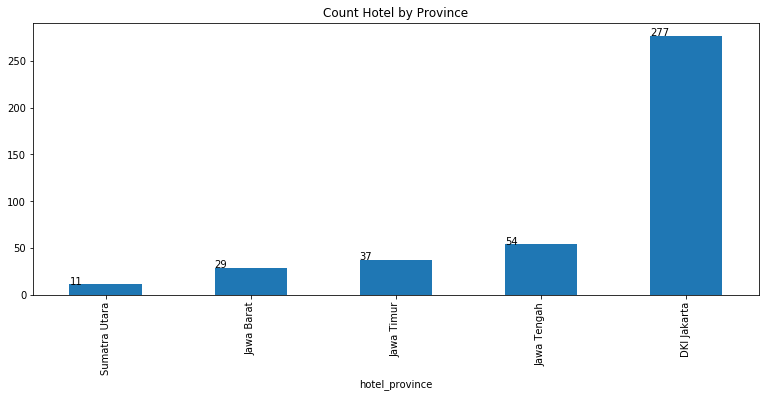

In [19]:
# Menghitung jumlah hotel berdasarkan provinsi
h = hotel_review_df.groupby('hotel_province')['hotel_id'].nunique().sort_values().plot(kind='bar',title='Count Hotel by Province')
for x in h.patches:
    h.annotate(str(x.get_height()),(x.get_x() * 1.0, x.get_height() * 1.0))

Terdapat 5 provinsi pada sebaran data hotel dimana DKI Jakarta menempati provisinsi paling banyak jumlah hotelnya sedangkan Sumatera Utara merupakan hotel paling sedikit

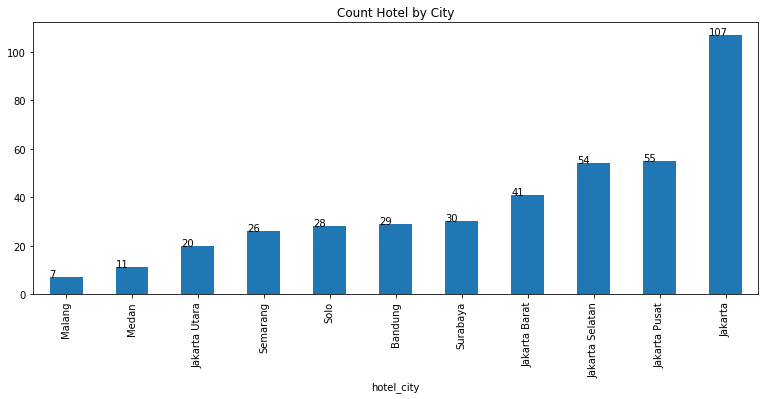

In [20]:
# Menghitung jumlah hotel berdasarkan kota
h = hotel_review_df.groupby('hotel_city')['hotel_id'].nunique().sort_values().plot(kind='bar',title='Count Hotel by City')
for x in h.patches:
    h.annotate(str(x.get_height()),(x.get_x() * 1.0, x.get_height() * 1.0))

Terdapat 11 kota pada sebaran data hotel dimana Jakarta menempati kota paling banyak jumlah hotelnya sedangkan 
Malang merupakan hotel paling sedikit. Pada kota Jakarta belum menunjukan sebaran secara akurat dikarenakan masih
terbagi lagi menjadi Jakarta Barat, Selatan, Pusat atau Timur, hal ini perlu di lakukan cleansing data lanjutan

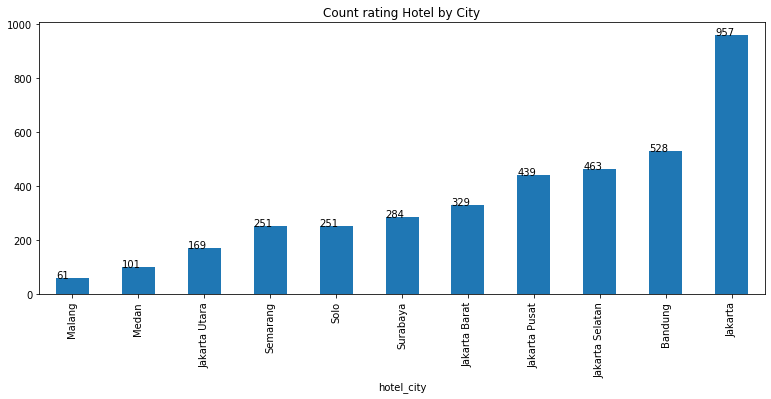

In [21]:
# Menghitung rata-rata rating hotel tiap kota
h = hotel_review_df.groupby('hotel_city')['num_votes'].sum().sort_values().plot(kind='bar',title='Count rating Hotel by City')
for x in h.patches:
    h.annotate(str(x.get_height()),(x.get_x() * 1.0, x.get_height() * 1.0))

Jumlah user yang melakukan review terhadap hotel berdasarkan kota dimana review paling banyak di Jakarta

## 4. Pembentukan Model
### 4.1 Simple Recommender
Disini akan digunakan rumus weight average untuk mendapatkan score dari tiap hotel
<img src='weight-avg.png' height='10'>

In [22]:
# Mengambil rata2 rating
C = hotel_review_df['rating'].mean()
print(C)

8.371491985683155


In [23]:
# Mencari nilai M
# Kita ambil contoh hotel dengan num_votes di atas 80% populasi, 
# jadi populasi yang akan kita ambil hanya sebesar 20%. 
m = hotel_review_df['num_votes'].quantile(0.8)
print(m)

10.0


In [24]:
# Membuat fungsi weighted formula
def imdb_weighted_rating(df, var=0.8):
    v = df['num_votes']
    R = df['rating']
    C = df['rating'].mean()
    m = df['num_votes'].quantile(var)
    df['score'] = (v/(v+m)*R) + (m/(v+m)*C) #Rumus IMDb 
    return df['score']

In [25]:
# Memberi score dari masing-masing hotel
imdb_weighted_rating(hotel_review_df)

0      8.647661
1      8.345746
2      8.565746
3      8.445746
4      8.205746
         ...   
403    8.309577
404    8.870497
405    8.737164
406    8.843831
407    7.750497
Name: score, Length: 408, dtype: float64

In [26]:
hotel_review_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,stay_duration,adults,children,rating,num_votes,score
0,h0001,Midtown Residence Marvell City Surabaya,no info,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667,1.4,1.6,0.4,9.20,5,8.647661
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,1.3,1.3,0.5,8.32,10,8.345746
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,1.6,1.6,0.4,8.76,10,8.565746
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,1.3,1.5,0.5,8.52,10,8.445746
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,1.4,1.6,0.3,8.04,10,8.205746


In [27]:
def hotel_search_recommender(df,family_room,city,location,top=10):
    
    # family_room yaitu rata2 children >= 1 & rata2 adult > 1
    # gunakan modus untuk filter family room
    if family_room.lower() == 'yes':
        df = df.loc[(df['children']>=1.0) | (df['adults']>1.0)]
    elif family_room.lower() == 'all':
        df = df
    
    # cek city
    if city.lower() == 'all':
        df = df
    else:    
        df = df.loc[df['hotel_city'].str.lower() == city.lower()]
        
    # cek location
    if location.lower() == 'all':
        df = df
    else:
        def filter_location(x):
            if location.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['hotel_address'].str.split().apply(lambda x: filter_location(x))]
        
    df = df.loc[df['num_votes'] >= m] 
    df = df.sort_values(by='score', ascending=False)
    
    # Tampilkan top-n data
    df = df[:top]
    return df

In [28]:
df = hotel_review_df.copy()

In [35]:
# # Contoh menampilkan Family tipe room di kota surabaya 
hotel_search_recommender(df,family_room='all',city='surabaya',location='all',top=10)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,stay_duration,adults,children,rating,num_votes,score
15,h0016,Best Western Papilio Hotel,Welcome to Best Western Papilio Hotel!,Jawa Timur,Surabaya,"Jl. Ahmad Yani 176 - 178, Surabaya",305890.0,1.2,1.3,0.8,9.52,10,8.945746
9,h0010,Neo+ Waru Sidoarjo by ASTON,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Surabaya,"Jl. S. Parman No. 52-54, Waru, Sidoarjo, Surab...",293122.5,1.6,1.7,0.5,9.48,10,8.925746
24,h0032,Yello Hotel Jemursari,Sebuah hotel yang nyaman dan strategis di Sura...,Jawa Timur,Surabaya,"Jl. Raya Jemursari 176, Surabaya, Jawa Timur, ...",513000.0,1.3,1.5,0.4,9.28,10,8.825746
10,h0011,favehotel Sidoarjo,Penginapan Yang Tenang Dan Nyaman di Sidoarjo.,Jawa Timur,Surabaya,"Jl. Jenggolo No. 15, Pucang, Kec. Sidoarjo, Ka...",447216.0,1.5,1.4,0.6,9.08,10,8.725746
6,h0007,Evora Hotel Surabaya,Ketika bisnis dan kenyamanan sinergi di satu t...,Jawa Timur,Surabaya,"Jl. Menur 18 - 20, Surabaya, Indonesia",283000.0,1.6,1.5,0.5,9.04,10,8.705746
29,h0043,POP! Hotel Gubeng,"Sebuah Hotel Modern yang Terjangkau di Gubeng,...",Jawa Timur,Surabaya,"Jl. Bangka 8-18, Gubeng, Surabaya",313000.0,1.6,1.4,0.4,8.76,10,8.565746
22,h0030,Front One Inn Sidoarjo,Penginapan Yang Tenang Dan Nyaman di Sidoarjo.,Jawa Timur,Surabaya,"Jl. Trunojoyo No. 41, Sidoarjo, Jawa Timur, In...",250000.0,1.7,1.5,0.5,8.76,10,8.565746
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.0,1.6,1.6,0.4,8.76,10,8.565746
17,h0019,Sumi Hotel Surabaya,Penginapan tenang dan nyaman di Sumi Hotel,Jawa Timur,Surabaya,"Jl. Mayjend Sungkono No. 37 A, Surabaya, Indon...",291772.0,1.5,1.7,0.5,8.72,10,8.545746
19,h0022,Quest Hotel Darmo - Surabaya by ASTON,"Sebuah Hotel yang Nyaman, Lengkap, dan Terjang...",Jawa Timur,Surabaya,"Jl. Ronggolawe No. 27-29, Surabaya, Jawa Timur...",360217.0,1.6,1.6,0.4,8.60,10,8.485746


In [95]:
# Contoh menampilkan semua tipe room di kota surabaya berlokasi di Waru
hotel_search_recommender(df,family_room='all',city='surabaya',location='waru',top=5)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,stay_duration,adults,children,rating,num_votes,score
9,h0010,Neo+ Waru Sidoarjo by ASTON,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Surabaya,"Jl. S. Parman No. 52-54, Waru, Sidoarjo, Surab...",293122.500000,1.6,1.7,0.5,9.48,10,8.925746
11,h0012,News Front One Hotel Surabaya,Rasakan keramahan kota Surabaya di News Hotel ...,Jawa Timur,Surabaya,"Jl. Pondok Maspion Blok S No. 1, Pepelegi, War...",239118.333333,1.7,1.5,0.9,7.48,10,7.925746


### 4.2 Content Based Filtering

Pada kasus ini deskripsi hotel akan dihitung menggunakan TF-IDF dan cosine similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
import re
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ariflaksito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
# Text Processing
# Gunakan library Sastrawi untuk stopword bahasa indonesia
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')
sastrawi = StopWordRemoverFactory()
stopworda = sastrawi.get_stop_words()

def clean_text(text):
    text = text.lower()
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stopworda)
    return text

In [97]:
 hotel_review_df['desc_clean'] = hotel_review_df['hotel_description'].apply(clean_text)

In [98]:
hotel_review_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,stay_duration,adults,children,rating,num_votes,score,desc_clean
0,h0001,Midtown Residence Marvell City Surabaya,no info,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667,1.4,1.6,0.4,9.20,5,8.647661,no info
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,1.3,1.3,0.5,8.32,10,8.345746,hotel mewah surabaya persembahan archipelago i...
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,1.6,1.6,0.4,8.76,10,8.565746,hotel bintang 3 satusatunya sidoarjo
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,1.3,1.5,0.5,8.52,10,8.445746,penginapan tenang nyaman surabaya
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,1.4,1.6,0.3,8.04,10,8.205746,win hotel hotel smart bintang 3 menawarkan lay...


In [99]:
# Hitung TF-IDF dan Cosine similarity
hotel_review_df.set_index('hotel_name', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0,)
tfidf_matrix = tf.fit_transform(hotel_review_df['desc_clean'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00522861, ..., 0.00166914, 0.02794099,
        0.0026817 ],
       [0.        , 0.00522861, 1.        , ..., 0.00255142, 0.02524113,
        0.0212881 ],
       ...,
       [0.        , 0.00166914, 0.00255142, ..., 1.        , 0.0351547 ,
        0.08243969],
       [0.        , 0.02794099, 0.02524113, ..., 0.0351547 , 1.        ,
        0.05933752],
       [0.        , 0.0026817 , 0.0212881 , ..., 0.08243969, 0.05933752,
        1.        ]])

In [100]:
indices = pd.Series(hotel_review_df.index)
indices[:15]

0     Midtown Residence Marvell City Surabaya
1              favehotel Graha Agung Surabaya
2                      The Sun Hotel Sidoarjo
3                        Grand Surabaya Hotel
4                      The WIN Hotel Surabaya
5            POP! Hotel Stasiun Kota Surabaya
6                        Evora Hotel Surabaya
7                MaxOneHotels at Dharmahusada
8                     Zoom Dharmahusada Hotel
9                 Neo+ Waru Sidoarjo by ASTON
10                         favehotel Sidoarjo
11              News Front One Hotel Surabaya
12                    Gunawangsa Manyar Hotel
13              Zest Hotel Jemursari Surabaya
14                    The Life Hotel Surabaya
Name: hotel_name, dtype: object

In [108]:
# Modelling recommender system
def recommendations(name, top = 10):
    
    recommended_hotel = []
    rec_hotel = dict()
    
    idx = indices[indices == name].index[0]

    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    top = top + 1
    top_indexes = list(score_series.iloc[1:top].index)
    
    for i in top_indexes:
        rec_hotel.update({list(hotel_review_df.index)[i]:score_series[i]})
        
    return rec_hotel

In [109]:
recommendations('favehotel Sidoarjo', 20)

{'favehotel Sidoarjo': 1.0,
 'Smart Budget Hotel': 0.31985244528874657,
 'Radja Art and Boutique Hotel': 0.31985244528874657,
 'Pesonna Hotel Semarang': 0.31985244528874657,
 'Louis Kienne Hotel Pemuda': 0.31985244528874657,
 'Louis Kienne Hotel Pandanaran': 0.31985244528874657,
 'Continent My Tower Hotel, Surabaya - Rungkut': 0.2922566788734993,
 'Grand Surabaya Hotel': 0.2922566788734993,
 'The Himana Malang (Malang City Point)': 0.2862348279969526,
 'Gets Hotel Malang': 0.2862348279969526,
 'Hotel 88 Kedungsari ( Kedungdoro )': 0.26179217427787227,
 'Gets Hotel Semarang': 0.22651003433634342,
 'Sumi Hotel Surabaya': 0.2126987865120978,
 'Guest House Taman Sari': 0.20704466694857057,
 'Luminor Hotel Airport Sidoarjo': 0.19714048789858746,
 'The Sun Hotel Sidoarjo': 0.168451139864053,
 'Aruuman Hotel Simpanglima Semarang': 0.14017247153827747,
 'Hotel Rivoli Senen Jakarta': 0.12201251568806594,
 'Bobobox Pods Pancoran': 0.11326307801758351,
 'B Shaw Hotel & Restaurant': 0.113085671616

## 5. Evaluasi
Evaluasi kedepan model ini bisa dengan dibangun sistem untuk merecord kegiatan user setelah mendapatkan rekomendasi tersebut. Data hotel manakah yang dipilih user untuk di lihat selanjutnya dan berapa kali data tersebut dilihat. Selanjutnya bisa kita simpan data tersebut untuk dilakukan modeling prediksi dan dievaluasi menggunakan confusion matrix

## 6. Peningkatan sistem rekomendasi
Untuk meningkatkan model dari rekomendasi ini bisa digunakan model penghitungan jarak kemiripan yang lain 
seperti pearson correlation atau euclidean distance. Selain itu untuk mendapatkan serendipity, novelty dari data
rekomendasi sebaiknya juga menerapkan model collaborative filtering